In [2]:
#import the libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
#load the data into a data frame
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#show some statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


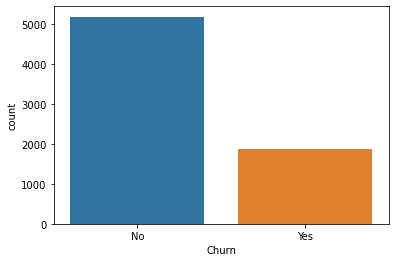

In [8]:
#visualize the count of customer churn
sns.countplot(df['Churn'])

In [9]:
#what is the percentage of customers that are leaving
num_retained = df[df.Churn == 'No'].shape[0]
num_CHurned = df[df.Churn == 'Yes'].shape[0]

#print the percentage of customers that stayed
print(num_retained/(num_retained+num_CHurned)*100,'% of customers stayed with the company')

#print the percentage of customers that left
print(num_CHurned/(num_retained+num_CHurned)*100,'% of customers left with the company')

73.4630129206304 % of customers stayed with the company
26.536987079369588 % of customers left with the company


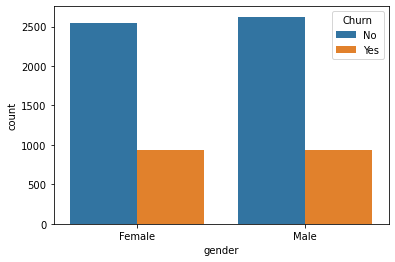

In [10]:
#visualize the churn count for both males and females
sns.countplot(x='gender', hue='Churn', data=df)

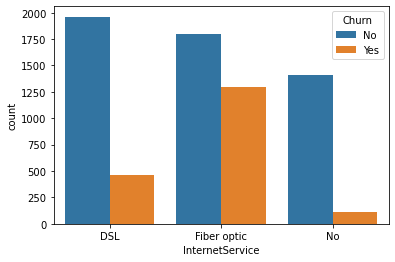

In [12]:
#visualize the churn count the internet service
sns.countplot(x='InternetService', hue='Churn', data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4E6C1F0A0>,
      dtype=object)

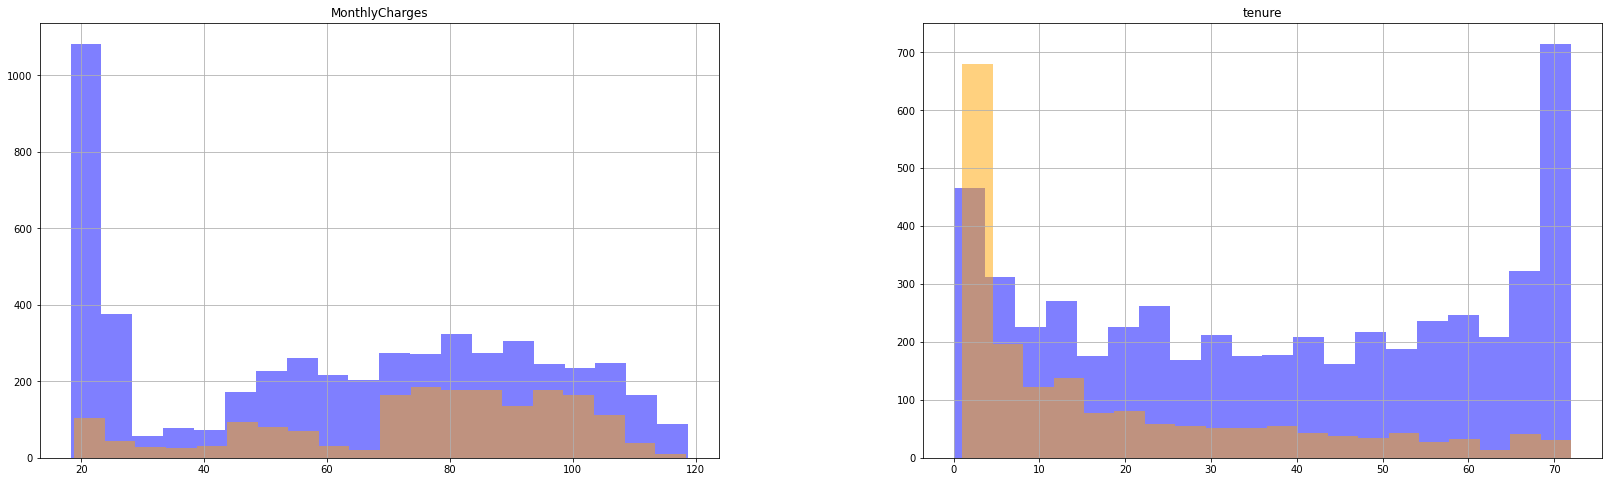

In [17]:
num_features = ['MonthlyCharges','tenure']
fig,ax = plt.subplots(1, 2, figsize=(28,8))
df[df.Churn == 'No'][num_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][num_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)

In [18]:
#remove unneceary columns
cleaned_df = df.drop('customerID', axis=1)

#look at the number of rows and cols in the data
cleaned_df.shape

(7043, 20)

In [22]:
#convert all of the non nmerin columns to numeric
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number:
        continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

In [23]:
#show the new data set data types
cleaned_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [24]:
#show the first 5 row of the new dataset
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [25]:
#scaled the data
X = cleaned_df.drop('Churn', axis=1) #feaure dataset
y = cleaned_df['Churn']

X = StandardScaler().fit_transform(X)

In [26]:
#spli the data 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [27]:
#create the model
model = LogisticRegression()
#train the model
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
#create the predictions on the test data
predictions = model.predict(x_test)

#print the predictions
print(predictions)

[1 0 0 ... 0 0 0]


In [29]:
#check the  precision recall fiscore
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

